# Import Libraries

In [14]:
# Import the NumPy library, commonly used for numerical operations
import numpy as np
# Import the Pandas library, used for data manipulation and analysis
import pandas as pd
# Import the load and dump functions from the joblib library
# These functions are used for saving and loading models and other Python objects
from joblib import load, dump
# Import the json module, which allows working with JSON data in Python
import json

## Import Data and Explore

In [15]:
import os
# List all files and directories in the specified directory
# os.listdir('/kaggle/input/ml-prag-dataset/')
os.listdir('/input/')

import pandas as pd
# Read the CSV file into a DataFrame
# train = pd.read_csv('/kaggle/input/ml-prag-dataset/Crop_recommendation.csv')
train = pd.read_csv('.\\input\\Crop_recommendation.csv')

# Print the column names of the DataFrame
print(train.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


## Encode Categorical Labels

In [16]:
from sklearn.preprocessing import LabelEncoder

# Extract the 'label' column from the DataFrame 'train'
labels = train['label']
# Initialize a LabelEncoder object to encode categorical labels into numerical values
crop_encoder = LabelEncoder()
# Fit the LabelEncoder to the labels and transform them into encoded numerical labels
encoded_labels = crop_encoder.fit_transform(labels)

## Train-Test Split

In [17]:
## train test split

# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# train: input features, encoded_labels: target labels, test_size: proportion of the dataset to include in the test split (20% here)
# random_state: controls the shuffling applied to the data before applying the split, ensuring reproducibility (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train, encoded_labels, test_size=0.20, random_state=42)

## Preprocess Training Data

In [18]:
# Remove the 'label' column from the training features
X_train = X_train.drop(columns=['label'])

train = X_train
encoded_labels = y_train

## Generate Random Crop Yields

In [19]:
# Import the NumPy library, commonly used for numerical operations
import numpy as np

# Define the lower and upper bounds for generating random crop yield values
lower_bound = 1.0
upper_bound = 3.0

# Define the shape of the array to be generated
shape = (len(train), 1)

# Generate random crop yield values within the specified bounds
crop_yield = np.random.uniform(lower_bound, upper_bound, shape)

## SVM Algorithm

Support Vector Machine (SVM) is a powerful algorithm used in supervised learning for both classification and regression tasks.

1. **Overview**:
   - SVM is a discriminative classifier that finds the optimal hyperplane in a high-dimensional space to separate data points into different classes.
   - It's a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution.
   - SVM aims to maximize the margin between the support vectors (data points closest to the decision boundary) of different classes.

2. **How it works**:
   - Given a set of training examples, each labeled with a class label, SVM maps the input data points into a high-dimensional feature space.
   - In this feature space, it finds the hyperplane that best separates the classes while maximizing the margin, which is the distance between the hyperplane and the nearest data point from each class.
   - For classification tasks, new data points are mapped into the same feature space, and their class is determined based on which side of the hyperplane they fall on.

3. **Parameters**:
   - Kernel function: SVM can use different kernel functions (linear, polynomial, radial basis function, etc.) to map data into higher-dimensional spaces.
   - Regularization parameter (C): Controls the trade-off between maximizing the margin and minimizing the classification error on the training data.
   - Gamma (for certain kernel functions): Influences the shape of the decision boundary.

4. **Implementation**:
   - Implementation involves loading the data, preprocessing (scaling, handling missing values, etc.), splitting it into training and testing sets, training the model, and evaluating its performance.

5. **Evaluation**:
   - Performance metrics for classification tasks include accuracy, precision, recall, F1-score, and ROC curves.

6. **Tuning**:
   - Hyperparameter tuning is crucial for SVM, particularly for choosing the optimal kernel function, regularization parameter (C), and, if applicable, gamma.
   - Techniques like cross-validation can be used for hyperparameter tuning.

We utilize the radial basis function (RBF) kernel as the default kernel function in our implementation, which works well for a wide range of datasets. However, it's essential to experiment with different kernels and hyperparameters to find the best configuration for a given problem.

In [20]:
# Define a Support Vector Machine (SVM) classifier as a Python class
class SVM:
    # Initialize the SVM classifier with default hyperparameters
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100, batch_size=32):
        self.lr = learning_rate        # Learning rate for gradient descent
        self.lambda_param = lambda_param  # Regularization parameter
        self.n_iters = n_iters         # Number of iterations for training
        self.batch_size = batch_size  # Batch size for stochastic gradient descent
        self.weights = None            # Weights for each class
        self.bias = None               # Bias term for each class
        self.classes = None            # Unique classes in the dataset

    # Method to fit (train) the SVM classifier to the training data
    def fit(self, X, y):
        # Get unique classes present in the target labels
        self.classes = np.unique(y)
        # Get the number of samples and features in the input data
        n_samples, n_features = X.shape
        # Initialize weights and bias arrays
        self.weights = np.zeros((len(self.classes), n_features))
        self.bias = np.zeros(len(self.classes))
        # Iterate over each class and train a binary SVM classifier
        for i, c in enumerate(self.classes):
            # Convert target labels to binary (1 for the current class, -1 for others)
            y_binary = np.where(y == c, 1, -1)
            # Initialize weight vector and bias term
            w = np.zeros(n_features)
            b = 0
            # Perform stochastic gradient descent to optimize weights and bias
            for _ in range(self.n_iters):
                # Randomly sample a batch of data points
                indices = np.random.choice(n_samples, self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y_binary[indices]
                # Compute decision scores and margins for the batch
                scores = np.dot(X_batch, w) - b
                margins = y_batch * scores
                # Identify misclassified samples
                misclassified = margins < 1
                # Compute gradients of the loss function
                grad_w = self.lambda_param * w - np.dot(X_batch.T, y_batch * misclassified) / self.batch_size
                grad_b = -np.sum(y_batch * misclassified) / self.batch_size
                # Update weights and bias using gradient descent
                w -= self.lr * grad_w
                b -= self.lr * grad_b
            # Store the optimized weights and bias for the current class
            self.weights[i] = w
            self.bias[i] = b

    # Method to predict the class labels for input data
    def predict(self, X):
        # Compute the decision scores for each class
        output = np.dot(X, self.weights.T) - self.bias
        # Return the class with the highest decision score for each sample
        return self.classes[np.argmax(output, axis=1)]

# Initialize an instance of the SVM classifier
svm_classifier = SVM()

## SVM Training

In [21]:
# Convert the DataFrame 'train' to a NumPy array representation
X_train = train.values
# Fit the SVM classifier to the training data
# X_train: Input features (training data)
# encoded_labels: Encoded numerical labels corresponding to the target classes
svm_classifier.fit(X_train, encoded_labels)

## SVM Prediction

In [22]:
encoded_labels
svm_classifier.predict(train)

array([16, 10, 10, ..., 17,  7, 10])

## Model Dumping

In [23]:


# Dump the trained SVM classifier for crop prediction
dump(svm_classifier, 'svm_crop_prediction.joblib')

# Dump the trained LabelEncoder for crop labels
dump(crop_encoder, 'crop_encoder.joblib')

['crop_encoder.joblib']

## Model Loading and Prediction Function

In [24]:
from joblib import load
import numpy as np
import pandas as pd

# Load the trained models and encoder
svm_crop_prediction = load('/kaggle/working/svm_crop_prediction.joblib')
crop_encoder = load('/kaggle/working/crop_encoder.joblib')

def get_recommendation(x):
    """
    Predicts crop based on input environmental data.

    Args:
    x (str): JSON string containing environmental data.

    Returns:
    tuple: Crop recommendation.
    """
    # Parse input JSON data
    data = json.loads(x)
    # Extract environmental features
    nitr = np.asarray(data['N']).reshape(-1,1)
    phos = np.asarray(data['P']).reshape(-1,1)
    pota = np.asarray(data['K']).reshape(-1,1)
    temp = np.asarray(data['temperature']).reshape(-1,1)
    humi = np.asarray(data['humidity']).reshape(-1,1)
    ph = np.asarray(data['ph']).reshape(-1,1)
    rain = np.asarray(data['rainfall']).reshape(-1,1)
    # Concatenate features into final input array
    final = np.concatenate([nitr, phos, pota, temp, humi, ph, rain], axis=1).reshape(-1,7)
    
    # Predict crop recommendation using SVM model
    crop = crop_encoder.inverse_transform(svm_crop_prediction.predict(final))
   
    # Print predictions
    print('Crop Recommendation: {}'.format(crop))

    # Return predictions
    return crop

## Example

In [25]:
import warnings
warnings.filterwarnings("ignore")

data = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature":20.87974371,
    "humidity":82.00274423,
    "ph" : 6.502985292000001,
    "rainfall":202.9355362
}

json_data = json.dumps(data)

crop = get_recommendation(json_data)

Crop Recommendation: ['rice']


## Testing & Graph

Crop Recommendation: ['muskmelon']
True Label: muskmelon | Predicted Label: ['muskmelon']
Crop Recommendation: ['watermelon']
True Label: watermelon | Predicted Label: ['watermelon']
Crop Recommendation: ['papaya']
True Label: papaya | Predicted Label: ['papaya']
Crop Recommendation: ['papaya']
True Label: papaya | Predicted Label: ['papaya']
Crop Recommendation: ['apple']
True Label: apple | Predicted Label: ['apple']
Crop Recommendation: ['mango']
True Label: mango | Predicted Label: ['mango']
Crop Recommendation: ['apple']
True Label: apple | Predicted Label: ['apple']
Crop Recommendation: ['papaya']
True Label: mothbeans | Predicted Label: ['papaya']
Crop Recommendation: ['mungbean']
True Label: mungbean | Predicted Label: ['mungbean']
Crop Recommendation: ['lentil']
True Label: lentil | Predicted Label: ['lentil']
Crop Recommendation: ['lentil']
True Label: blackgram | Predicted Label: ['lentil']
Crop Recommendation: ['orange']
True Label: coconut | Predicted Label: ['orange']
Cro

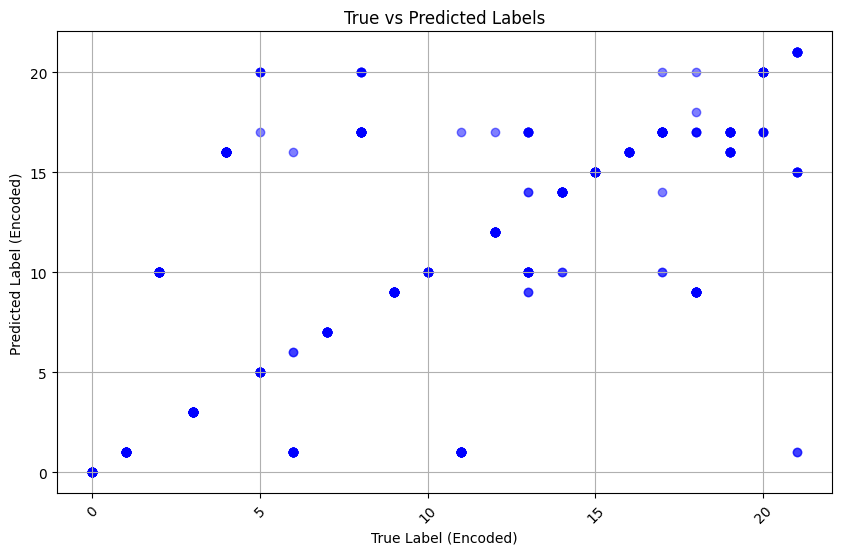

Accuracy: 0.5431818181818182


In [26]:
import warnings
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import json

# Make predictions on test data
y_true = crop_encoder.inverse_transform(y_test)  # Inverse transform encoded labels to get actual crop names
y_pred = []

for i in range(len(X_test)):
    # Convert the row to a dictionary with column names as keys
    data_dict = X_test.iloc[i].to_dict()
    # Convert the dictionary to JSON
    json_data = json.dumps(data_dict)
    crop= get_recommendation(json_data)
    y_pred.append(crop)  # Append predicted crop name
    
    # Print true value and predicted value
    print("True Label:", y_true[i], "| Predicted Label:", crop)

y_true_list = y_true.tolist()
y_pred_list = y_pred
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Convert crop names to integer labels
label_encoder = LabelEncoder()
y_true_int = label_encoder.fit_transform(y_true_list)
y_pred_int = label_encoder.transform(y_pred_list)

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_true_int, y_pred_int, color='blue', alpha=0.5)
plt.xlabel('True Label (Encoded)')
plt.ylabel('Predicted Label (Encoded)')
plt.title('True vs Predicted Labels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_true_int, y_pred_int)
print("Accuracy:", accuracy)